In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid", context="paper", palette="pastel", font="Georgia", font_scale=1.2)

In [2]:
df = pd.read_csv("datasets/housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
# Interquartile range = higher quartile - lower quartile
lower_quartile = df["housing_median_age"].quantile(0.25)
higher_quartile = df["housing_median_age"].quantile(0.75)

In [8]:
inter_quartile_range = higher_quartile - lower_quartile
print("Interquartile range: ", inter_quartile_range)

Interquartile range:  19.0


In [9]:
# semi interquartile range = inter quartile range/ 2
semi_inter_quartile_range = inter_quartile_range/2
print("Semi Interquartile range: ", semi_inter_quartile_range)

Semi Interquartile range:  9.5


In [10]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [11]:
for column in df.columns:
    print(column)

longitude
latitude
housing_median_age
total_rooms
total_bedrooms
population
households
median_income
median_house_value
ocean_proximity


In [12]:
[column for column in df.columns]

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [13]:
df.shape

(20640, 10)

In [15]:
#Check for null values in our dataset
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [16]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

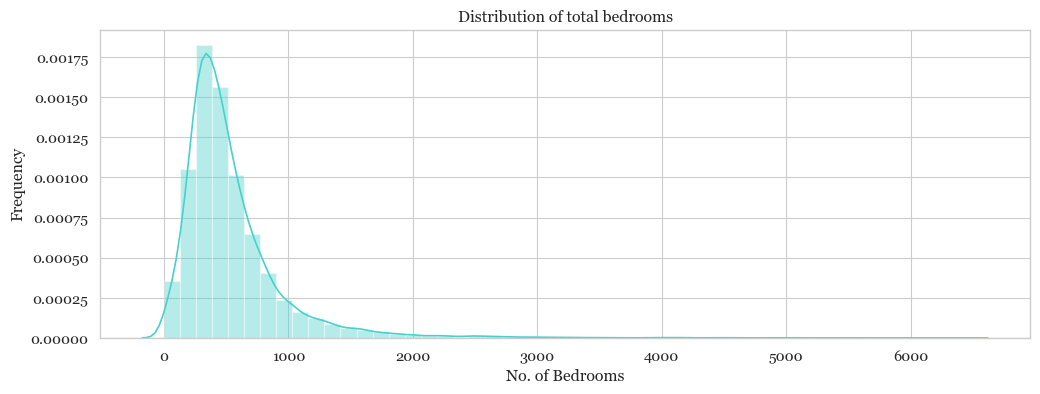

In [18]:
# Distribution of the total bedrooms in our dataset
plt.figure(figsize=(12,4))
sns.distplot(x=df["total_bedrooms"], color="mediumturquoise")
plt.title("Distribution of total bedrooms")
plt.xlabel("No. of Bedrooms")
plt.ylabel("Frequency");


In [19]:
#Filling null values in total_bedrooms
df["total_bedrooms"].fillna(value=df["total_bedrooms"].median(), inplace=True)

In [20]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

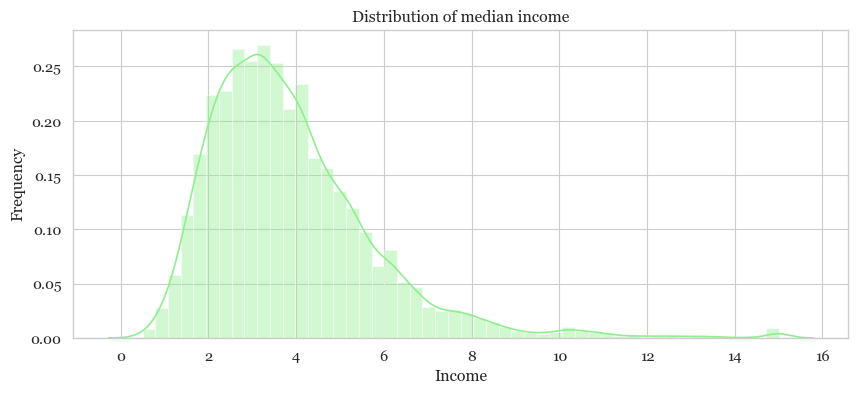

In [21]:
# Distribution of median income
plt.figure(figsize=(10, 4))
sns.distplot(x=df["median_income"], color="lightgreen")
plt.title("Distribution of median income")
plt.xlabel("Income")
plt.ylabel("Frequency");

In [22]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

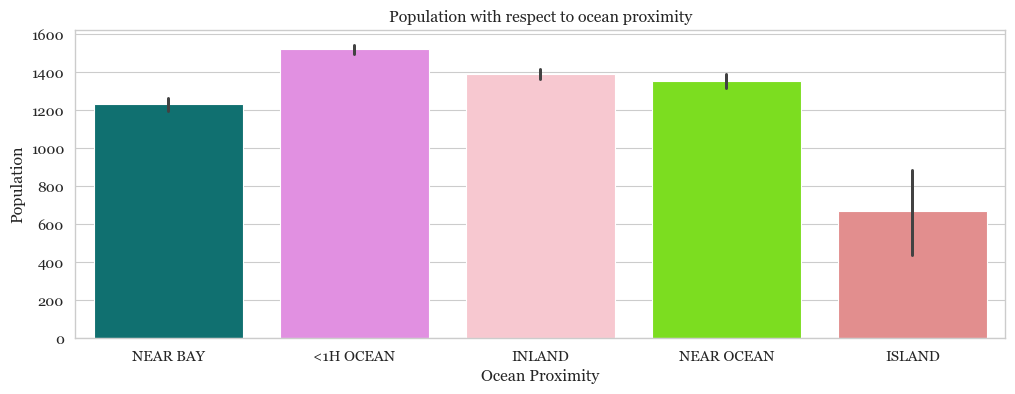

In [24]:
# Population in california based on ocean proximity
plt.figure(figsize=(12,4))
sns.barplot(x= "ocean_proximity", y= "population", data=df, palette=["teal", "violet", "pink", "lawngreen", "lightcoral"])
plt.title("Population with respect to ocean proximity")
plt.xlabel("Ocean Proximity")
plt.ylabel("Population");

In [25]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [26]:
df["ocean_proximity"].nunique()

5

In [27]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [28]:
import plotly.express as px

In [30]:
fig = px.scatter_mapbox(
    df,
    lat="latitude",
    lon="longitude",
    width=1000,
    height=600,
    color="median_house_value",
    title="Distribution of House prices in the city"
)
fig.update_layout(mapbox_style="open-street-map")

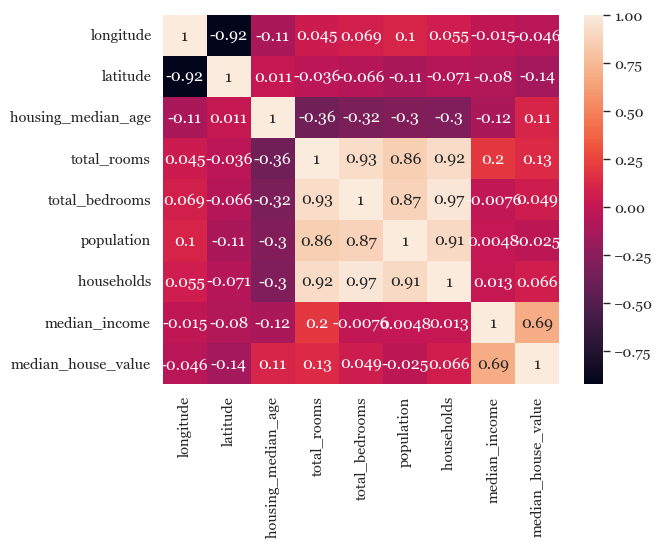

In [36]:
sns.heatmap(df.corr(), annot=True);